In [1]:
import os 
import pandas as pd
import numpy as np

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing
import event_manager
import epoching

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_rows',100)

In [2]:
def select_nsample_normal(df_label,max_sample=50):
    if len(df_label.label.unique()) > 1:
        max_sample = df_label.label[df_label.label!=0].value_counts().max()
        df_label_0 = df_label[df_label.label==0].iloc[:max_sample]
        max_sample=df_label.label[df_label.label!=0].value_counts().max()
        df_label_o = df_label[df_label.label!=0]
        df_label_list = pd.concat([df_label_o,df_label_0],axis=0)
    else:
        df_label_list = df_label.iloc[:max_sample]
    df_label_list = df_label_list.reset_index(drop=True)
    return df_label_list

In [3]:
audio_folder = '../../data/ICBHI_final_database'
list_audio_files = processing.get_list_recording(audio_folder)
print('Found {} recording files'.format(len(list_audio_files)))

Found 920 recording files


In [14]:
n_fft=10
win_len=0.200
win_shift=0.25
mean=False
audio_file  = '222_1b1_Pr_sc_Meditron'
audio_file = '223_1b1_Lr_sc_Meditron'
data_file = processing.load_file_from_recording_name(audio_folder,audio_file)
data_filtered,df_label = processing.preprocess_data(data_file,annotations='event')
df_label = event_manager.fill_gap_event_frame(df_label,data_filtered)
data_feature= processing.apply_wavelets(data_filtered)
df_label = event_manager.segment_event_annotation(data_filtered,win_len=win_len,win_shift=win_shift,threshold_class=[1,1,1])

In [15]:
print(df_label.label.value_counts())
df_label = select_nsample_normal(df_label)  
epochs_,_ = epoching.get_epoching_from_label(data_feature,df_label,mean=mean)
print(epochs_.shape)
print(df_label.label.value_counts())

0    91
2    26
Name: label, dtype: int64
(52, 60, 800)
2    26
0    26
Name: label, dtype: int64


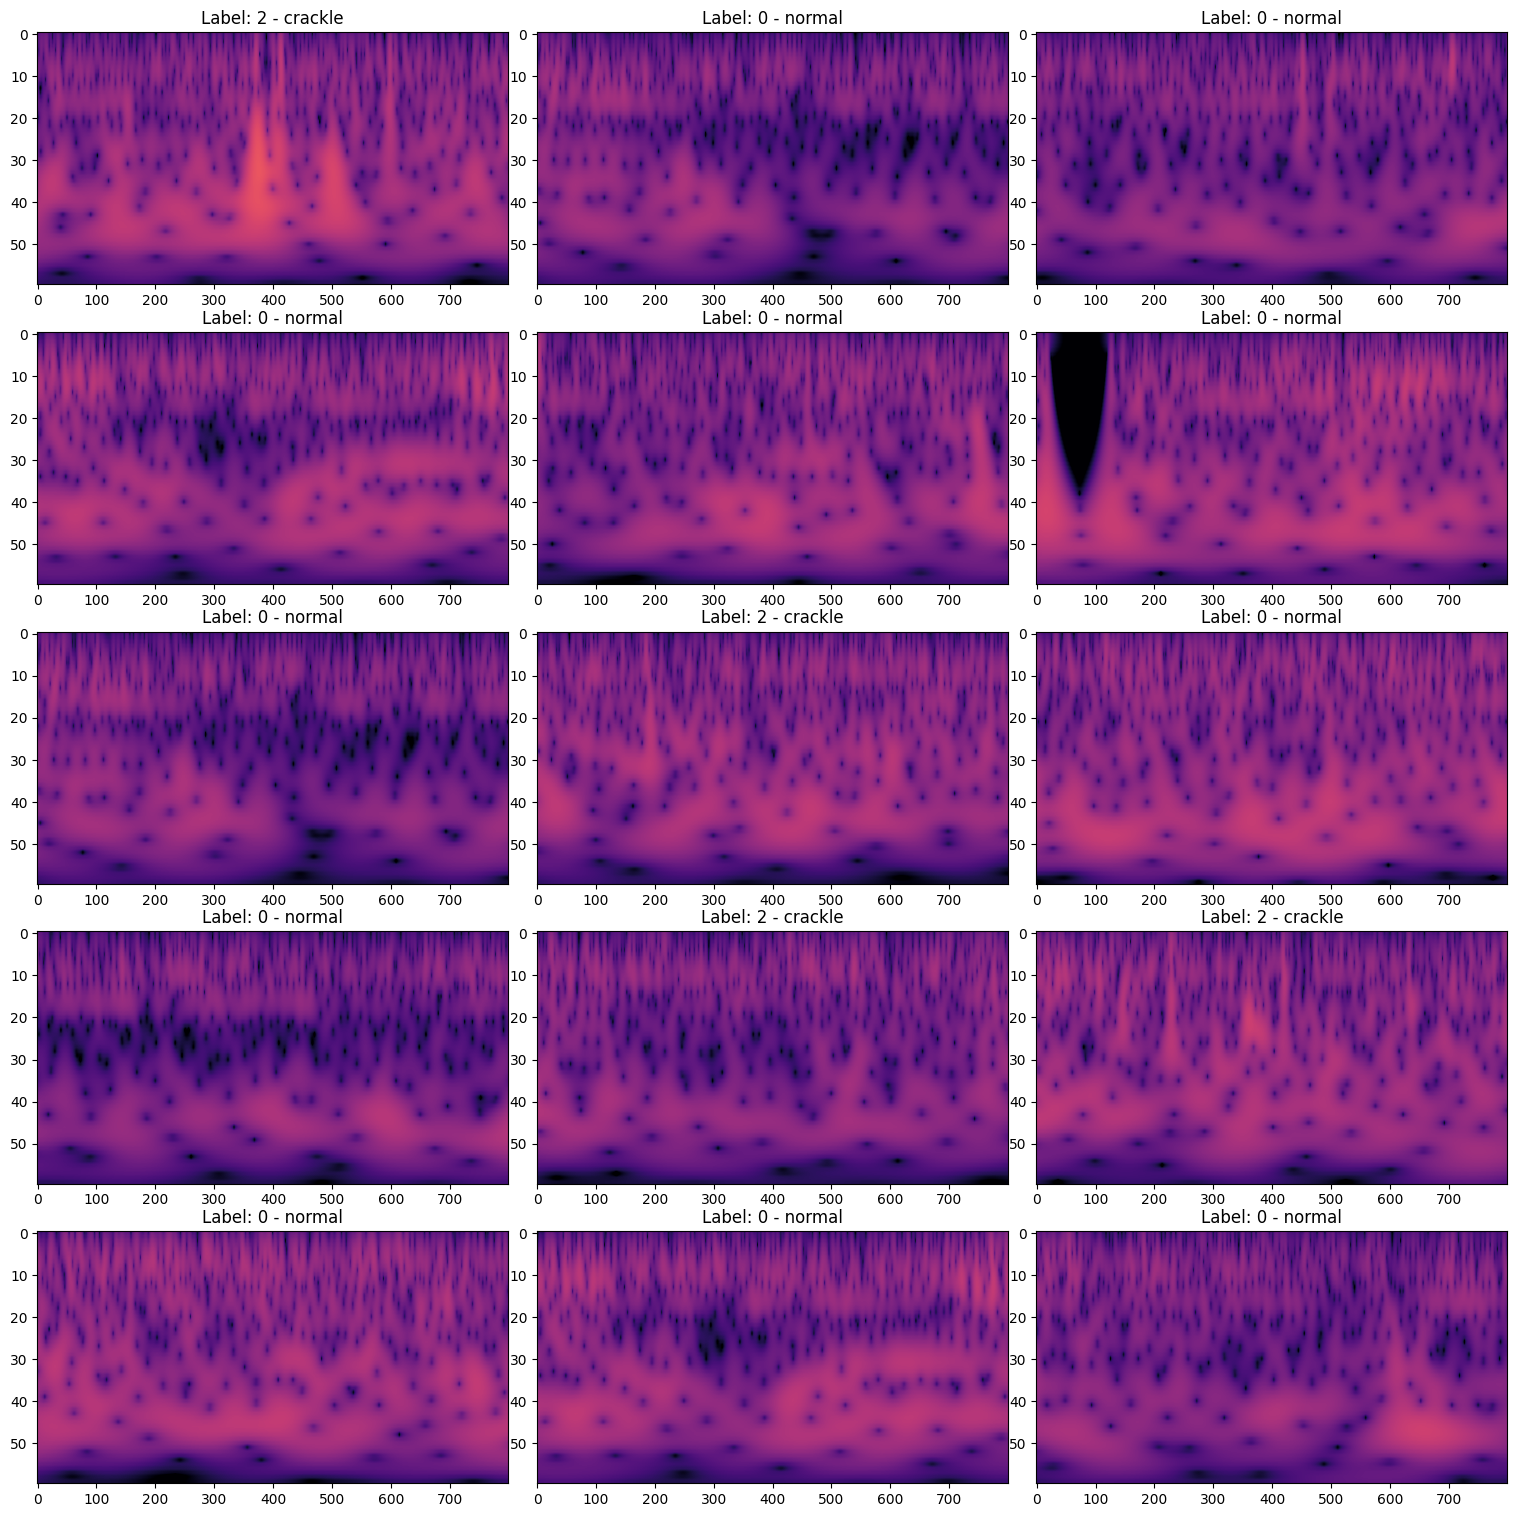

In [16]:

DB_RANGE = 100 # dynamic range to show in dB
CMAP = 'magma'

classes = {0:'normal',1:'wheeze',2:'crackle'}
f,axes = plt.subplots(5,3,figsize=(15,15))
axes = axes.flatten()
for ax in axes:
    index_classes_sample = df_label.sample().index[0]
    label_ = df_label.label.loc[index_classes_sample]
    try:
        index_padding = np.where(epochs_[index_classes_sample,1,:]==0)[0][0]
        ax.imshow(epochs_[index_classes_sample,:,:index_padding],cmap=CMAP, aspect='auto', norm=None, vmax=0, vmin=-DB_RANGE)
    except:
        ax.imshow(epochs_[index_classes_sample,:,:],cmap=CMAP, aspect='auto', norm=None, vmax=0, vmin=-DB_RANGE)
    #ax.invert_yaxis()
    ax.set_aspect("auto")
    ax.set_title('Label: {} - {}'.format(label_, classes[label_]))
f = plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)

In [7]:
df_label.label.value_counts()

1    533
0    533
Name: label, dtype: int64